# Chapter 3: synthetic data study
# Best results JME stabilizer


<div class="alert alert-success">
    
This Notebook contains the Code to produce Figures related to the Result comparison between conventional, ME standalone inversion and JME inversion.

In [1]:
# Importing pygimli
import  pygimli                 as     pg
import  pygimli.meshtools       as     mt
from    pygimli.physics         import ert
from    pygimli.physics         import TravelTimeManager
from    pygimli.viewer.mpl      import createColorBarOnly
from    JointEntropyClass       import JointEntropyInversion as JEI
from    PlotFunctions_Ch4       import *
# Importing auxiliary libraries
import  numpy                   as     np
import  matplotlib.pyplot       as     plt
import  sys


# Setting options
seed_val = 420
np.random.seed(seed_val)

path = 'C:/Users/anton.ziegon/Documents/GitHubRepos/Joint-Minimum-Entropy-Inversion-Paper/'

# Filenames
fn_ert_dd  = path+'Data/Synthetic/Synth_ert_dd.dat'
fn_tt      = path+'Data/Synthetic/Synth_tt.dat'

# Plotting
c_ert = 'gnuplot'
c_srt = 'viridis'
lim_ert = [5e1, 1e4]
ert_marks = [7e1, 7e3, 7e2]
ert_label = ['Square', 'Circle', 'Half-space']

lim_srt = [300, 4200]
srt_marks = [3e3, 2e3, 5e2, 4e3]
srt_label = ['Square', 'Circle', 'Layer 1', 'Layer 2']

## Geometry for Comparison

In [2]:
# Create layered subsurface
world = mt.createWorld([-35,-20], [35, 0], layers=[-13],marker=1)
# Create surface points for Diatreme
cube = mt.createRectangle(pos=[-8, -8], size=[9.0, 9.0],marker=3)
circ = mt.createCircle(pos=(8, -8), radius=4.5, nSegments=30,marker=4)
# Combine Diatreme and layered subsurface
geom = world + circ + cube

## Data and Inversion Mesh

In [3]:
# Loading ERT
ert_data = ert.load(fn_ert_dd)
ERT = ert.ERTManager(ert_data)

# Loading SRT
tt_data = pg.physics.traveltime.load(fn_tt)
SRT = TravelTimeManager(tt_data)

# inversion mesh
w = mt.createWorld([-65,-20], [65, 0])
for x in np.arange(-64,65,1):
    w.createNode([x,0])
invmesh = mt.createMesh(w,area=1.5)
extmesh = mt.appendTriangleBoundary(invmesh,xbound=100,ybound=100,marker=0)

# Conventional

In [4]:
v_est_con = SRT.invert(tt_data, mesh=invmesh, vTop=500, vBottom=4500, lam=9, secNodes=1, verbose=True, maxIter=30)

22/04/24 - 14:21:47 - pyGIMLi - INFO - Found 1 regions.
22/04/24 - 14:21:47 - pyGIMLi - INFO - Creating forward mesh from region infos.
22/04/24 - 14:21:47 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.
22/04/24 - 14:21:47 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
22/04/24 - 14:21:47 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
22/04/24 - 14:21:47 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x0000020D7964F810>
Data transformation: <pgcore._pygimli_.RTrans object at 0x0000020D7964F900>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000020D7964F8B0>
min/max (data): 0.0018/0.08
min/max (error): 0.96%/1.09%
min/max (start model): 2.2e-04/0.002
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 329.02 (dPhi = 79.52%) lam: 9
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 213.44 (dPhi = 35.11%) lam: 9.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 95.72 (dPhi = 54.89%) lam: 9.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 52.16 (dPhi = 45.55%) lam: 9.0
--------------------------------

## Reference models

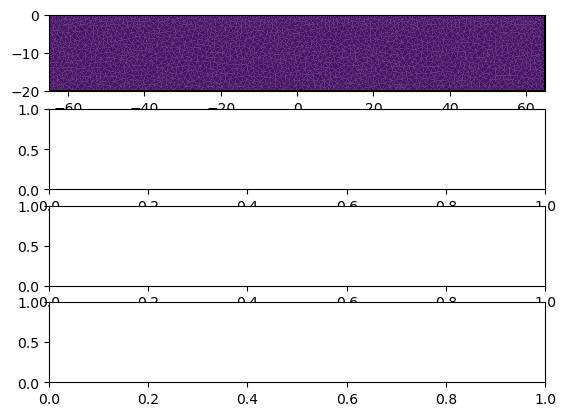

In [5]:
# Reference models
refmod_ert = pg.Vector(invmesh.cellCount(), 700) # homogenous 700Ohmm
refmod_srt = pg.Vector(invmesh.cellCount(), 1/500) # homogenous 500m/s in slowness

refmod_srt_2L = pg.Vector([1/4000 if c<=-13 else 1/500 for c in invmesh.cellCenters()[:,1]])
refmod_srt_gradient = SRT.inv.startModel
refmod_srt_convOut = 1/v_est_con

fig,ax = plt.subplots(nrows=4)
for i,ref in enumerate([refmod_srt,refmod_srt_2L,refmod_srt_gradient,refmod_srt_convOut]):
    pg.show(invmesh, 1/ref, ax=ax[i], cMap=c_srt, cMin=lim_srt[0], cMax=lim_srt[1],colorBar=False, logScale=False)
    ax[i].set_xlim(-35,35)
    ax[i].set_ylim(-20,0)

# Order q=1

In [6]:
q=1
beta = 1e-10

lam_ert = 3e-3
a_ert = 15

# lam_srt = 1e-2
# a_srt = 90
lam_srt = 5e-2
a_srt = 30

## JME - refmod_srt_gradient

22/04/24 - 14:24:00 - pyGIMLi - INFO - Found 2 regions.
22/04/24 - 14:24:00 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
22/04/24 - 14:24:00 - pyGIMLi - INFO - Creating forward mesh from region infos.
22/04/24 - 14:24:00 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
22/04/24 - 14:24:00 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
22/04/24 - 14:24:01 - pyGIMLi - INFO - Use median(data values)=619.288890298902
22/04/24 - 14:24:01 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]


Starting Iteration 0...
... ERT


22/04/24 - 14:24:07 - pyGIMLi - INFO - Found 1 regions.
22/04/24 - 14:24:07 - pyGIMLi - INFO - Creating forward mesh from region infos.
22/04/24 - 14:24:07 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.


... SRT
Starting iteration 1...
Set JME weights for ERT with q=1, b=1e-10 and a=15
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 5.23


22/04/24 - 14:24:23 - pyGIMLi - INFO - Create gradient starting model. 500: 5000
22/04/24 - 14:24:23 - pyGIMLi - INFO - Created startmodel from forward operator: [0.0019436  0.00100529 0.0019436  ... 0.00020856 0.00020207 0.0002198 ]


#####     SRT weighted misfit chi^2   = 130.38
#####     stabilizing functional    S = 336.14
#####     joint weighted misfit chi^2 = 135.61
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=1, b=1e-10 and a=15
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 1.15
#####     SRT weighted misfit chi^2   = 63.61
#####     stabilizing functional    S = 909.35
#####     joint weighted misfit chi^2 = 64.75
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=1, b=1e-10 and a=15
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 0.97
#####     SRT weighted misfit chi^2   = 34.03
#####     stabilizing functional    S = 768.35
#####     joint weighted misfit chi^2 = 34.99
############################################################
       
Starting iteration 4...
Set JME 

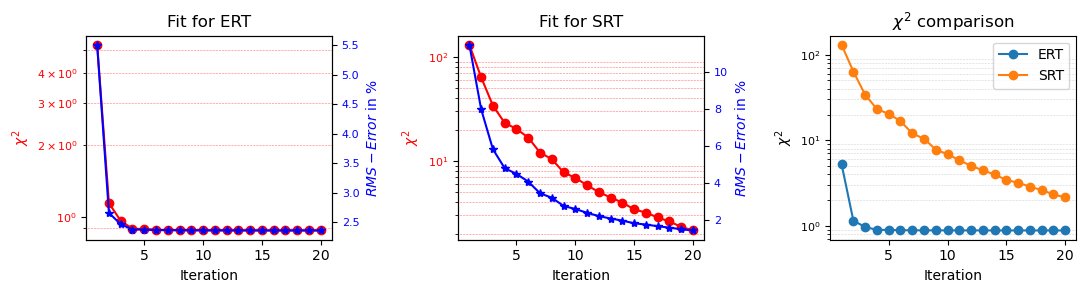

In [7]:
# Without weighting
a = [a_ert, a_srt]
lam = [lam_ert, lam_srt]
beta = beta
w1 = 1 # weight ert
w2 = 1 # weight srt

ERT1 = ert.ERTManager(ert_data)
SRT1 = TravelTimeManager(tt_data)
J1 = JEI(mgr_list=[ERT1,SRT1], data_list=[ert_data,tt_data], 
         mesh=invmesh, order=q, beta=beta,smooth_factor=a)

KWs = dict(lam=lam[1], verbose=False, vTop=500, vBottom=4500, secNodes=2)
KWs = dict(lam=lam[1], verbose=False, startModel=refmod_srt_gradient, secNodes=2)
KWe = dict(lam=lam[0], verbose=False)
J1.setMethodMesh(extmesh, 0)
J1.setKWInv([KWe, KWs])
J1.setNames(['ERT','SRT'])
J1.setMethodWeights([w1,w2])
J1.setReferenceModel([refmod_ert,refmod_srt])

J1.runInversion('ME', maxIter=20, breakup_criterion='all', chi_limit=1)
SRT1.inv.model = 1/SRT1.inv.model

[r_est_jme1, v_est_jme1] = J1.getModels()
    
J1.plotFitHistory()

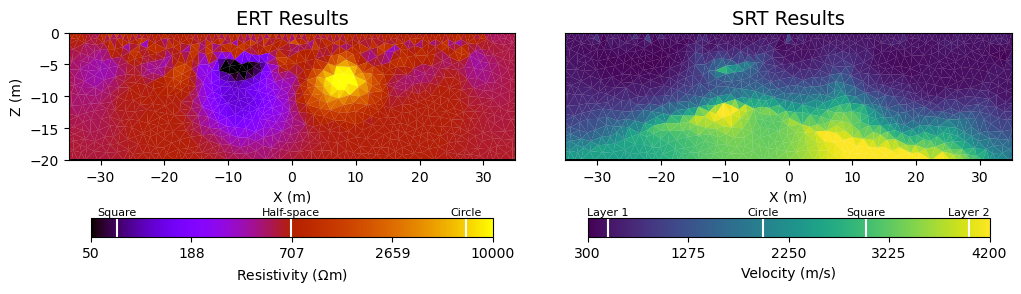

In [8]:
fig, ax, [cax1, cax2] = plotJointResultsComparison(invmesh, [r_est_jme1],  [v_est_jme1], 
                                                   c_ert, c_srt, lim_ert, lim_srt, ['no Sens'], labels=True,
                                                   ert_marks=ert_marks, srt_marks=srt_marks, 
                                                   ert_label=ert_label, srt_label=srt_label, marks=True)

## JME - refmod_srt_2L

22/04/24 - 14:29:02 - pyGIMLi - INFO - Found 2 regions.
22/04/24 - 14:29:02 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
22/04/24 - 14:29:02 - pyGIMLi - INFO - Creating forward mesh from region infos.
22/04/24 - 14:29:03 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
22/04/24 - 14:29:03 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
22/04/24 - 14:29:03 - pyGIMLi - INFO - Use median(data values)=619.288890298902
22/04/24 - 14:29:03 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]


Starting Iteration 0...
... ERT


22/04/24 - 14:29:09 - pyGIMLi - INFO - Found 1 regions.
22/04/24 - 14:29:09 - pyGIMLi - INFO - Creating forward mesh from region infos.
22/04/24 - 14:29:09 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.


... SRT
Starting iteration 1...
Set JME weights for ERT with q=1, b=1e-10 and a=15
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 5.16


22/04/24 - 14:29:31 - pyGIMLi - INFO - Create gradient starting model. 500: 5000
22/04/24 - 14:29:31 - pyGIMLi - INFO - Created startmodel from forward operator: [0.0019436  0.00100529 0.0019436  ... 0.00020856 0.00020207 0.0002198 ]


#####     SRT weighted misfit chi^2   = 21.41
#####     stabilizing functional    S = 20257.76
#####     joint weighted misfit chi^2 = 26.57
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=1, b=1e-10 and a=15
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 1.36
#####     SRT weighted misfit chi^2   = 15.54
#####     stabilizing functional    S = 527.73
#####     joint weighted misfit chi^2 = 16.89
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=1, b=1e-10 and a=15
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 1.26
#####     SRT weighted misfit chi^2   = 12.58
#####     stabilizing functional    S = 493.67
#####     joint weighted misfit chi^2 = 13.84
############################################################
       
Starting iteration 4...
Set JME 

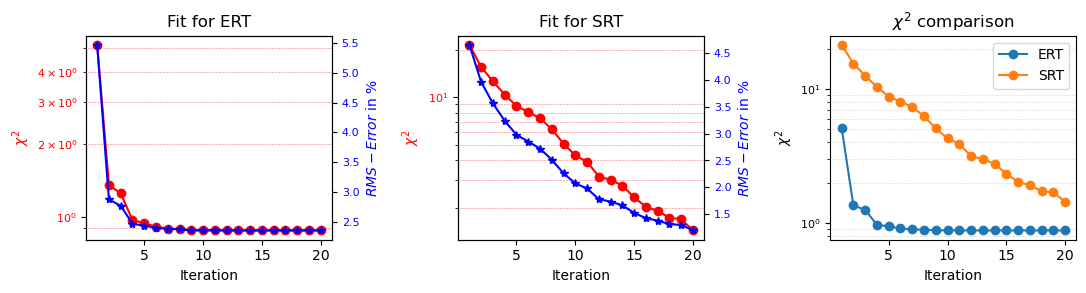

In [9]:
# Without weighting
a = [a_ert, a_srt]
lam = [lam_ert, lam_srt]
beta = beta
w1 = 1 # weight ert
w2 = 1 # weight srt

ERT2 = ert.ERTManager(ert_data)
SRT2 = TravelTimeManager(tt_data)
J2 = JEI(mgr_list=[ERT2,SRT2], data_list=[ert_data,tt_data], 
         mesh=invmesh, order=q, beta=beta,smooth_factor=a)

KWs = dict(lam=lam[1], verbose=False, startModel=refmod_srt_2L, secNodes=2)
KWe = dict(lam=lam[0], verbose=False)
J2.setMethodMesh(extmesh, 0)
J2.setKWInv([KWe, KWs])
J2.setNames(['ERT','SRT'])
J2.setMethodWeights([w1,w2])
J2.setReferenceModel([refmod_ert,refmod_srt])

J2.runInversion('ME', maxIter=20, breakup_criterion='all', chi_limit=1)
SRT2.inv.model = 1/SRT2.inv.model

[r_est_jme2, v_est_jme2] = J2.getModels()
    
J2.plotFitHistory()

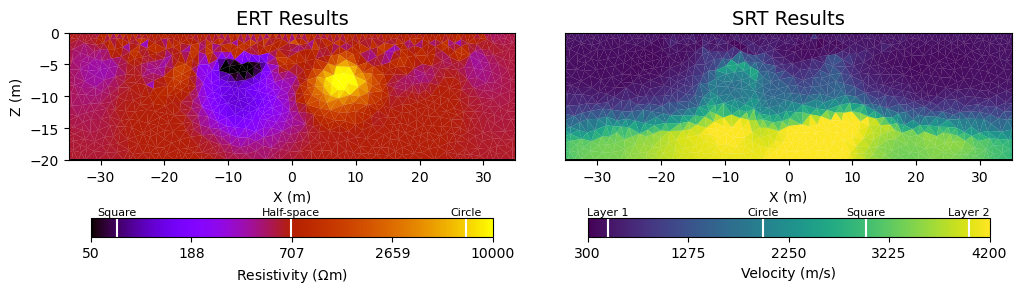

In [10]:
fig, ax, [cax1, cax2] = plotJointResultsComparison(invmesh, [r_est_jme2],  [v_est_jme2], 
                                                   c_ert, c_srt, lim_ert, lim_srt, ['no Sens'], labels=True,
                                                   ert_marks=ert_marks, srt_marks=srt_marks, 
                                                   ert_label=ert_label, srt_label=srt_label, marks=True)

## JME - refmod_srt_convOut

22/04/24 - 14:33:54 - pyGIMLi - INFO - Found 2 regions.
22/04/24 - 14:33:54 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
22/04/24 - 14:33:54 - pyGIMLi - INFO - Creating forward mesh from region infos.
22/04/24 - 14:33:54 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
22/04/24 - 14:33:54 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
22/04/24 - 14:33:54 - pyGIMLi - INFO - Use median(data values)=619.288890298902


Starting Iteration 0...
... ERT


22/04/24 - 14:33:54 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
22/04/24 - 14:34:01 - pyGIMLi - INFO - Found 1 regions.
22/04/24 - 14:34:01 - pyGIMLi - INFO - Creating forward mesh from region infos.
22/04/24 - 14:34:01 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.


... SRT
Starting iteration 1...
Set JME weights for ERT with q=1, b=1e-10 and a=15
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 5.09


22/04/24 - 14:34:28 - pyGIMLi - INFO - Create gradient starting model. 500: 5000
22/04/24 - 14:34:28 - pyGIMLi - INFO - Created startmodel from forward operator: [0.0019436  0.00100529 0.0019436  ... 0.00020856 0.00020207 0.0002198 ]


#####     SRT weighted misfit chi^2   = 2.07
#####     stabilizing functional    S = 116.14
#####     joint weighted misfit chi^2 = 7.16
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=1, b=1e-10 and a=15
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 1.28
#####     SRT weighted misfit chi^2   = 1.87
#####     stabilizing functional    S = 285.24
#####     joint weighted misfit chi^2 = 3.15
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=1, b=1e-10 and a=15
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 0.92
#####     SRT weighted misfit chi^2   = 1.69
#####     stabilizing functional    S = 203.79
#####     joint weighted misfit chi^2 = 2.62
############################################################
       
Starting iteration 4...
Set JME weights 

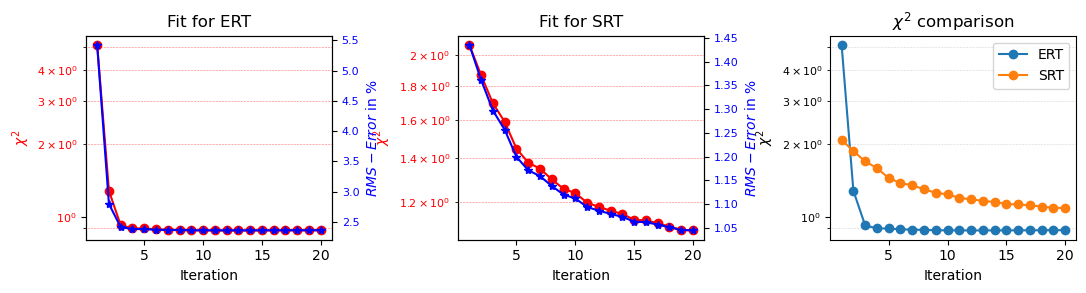

In [11]:
# Without weighting
a = [a_ert, a_srt]
lam = [lam_ert, lam_srt]
beta = beta
w1 = 1 # weight ert
w2 = 1 # weight srt

ERT3 = ert.ERTManager(ert_data)
SRT3 = TravelTimeManager(tt_data)
J3 = JEI(mgr_list=[ERT3,SRT3], data_list=[ert_data,tt_data], 
         mesh=invmesh, order=q, beta=beta,smooth_factor=a)

KWs = dict(lam=lam[1], verbose=False, startModel=refmod_srt_convOut, secNodes=2)
KWe = dict(lam=lam[0], verbose=False)
J3.setMethodMesh(extmesh, 0)
J3.setKWInv([KWe, KWs])
J3.setNames(['ERT','SRT'])
J3.setMethodWeights([w1,w2])
J3.setReferenceModel([refmod_ert,refmod_srt])

J3.runInversion('ME', maxIter=20, breakup_criterion='all', chi_limit=1)
SRT3.inv.model = 1/SRT3.inv.model

[r_est_jme3, v_est_jme3] = J3.getModels()
    
J3.plotFitHistory()

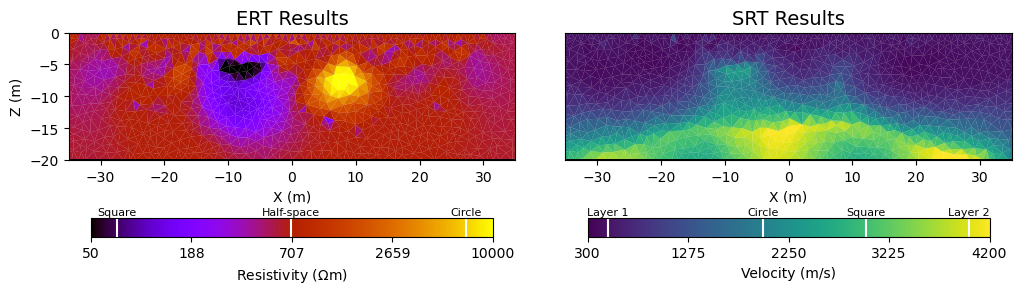

In [12]:
fig, ax, [cax1, cax2] = plotJointResultsComparison(invmesh, [r_est_jme3],  [v_est_jme3], 
                                                   c_ert, c_srt, lim_ert, lim_srt, ['no Sens'], labels=True,
                                                   ert_marks=ert_marks, srt_marks=srt_marks, 
                                                   ert_label=ert_label, srt_label=srt_label, marks=True)

# Comparison Results

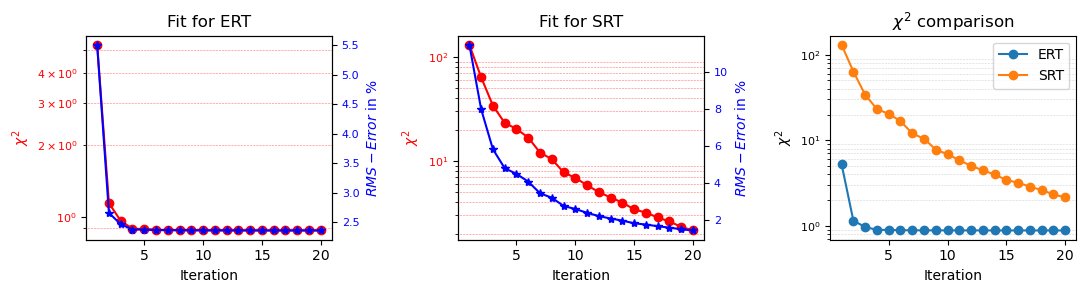

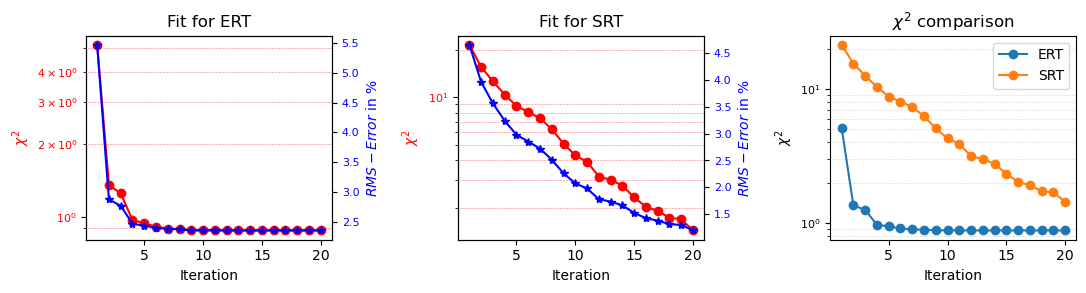

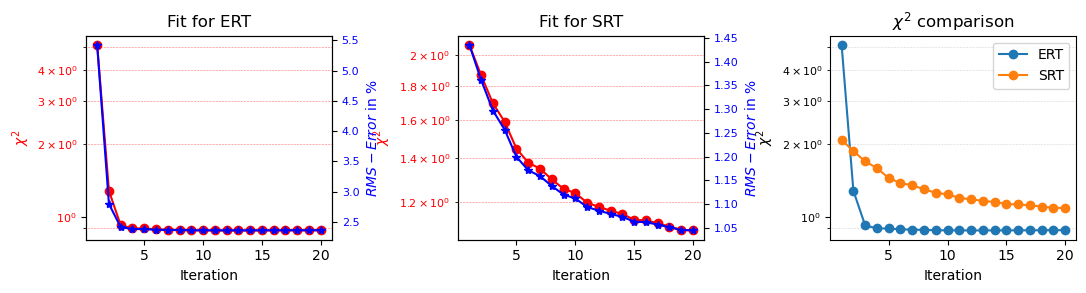

In [13]:
J1.plotFitHistory()
J2.plotFitHistory()
J3.plotFitHistory()

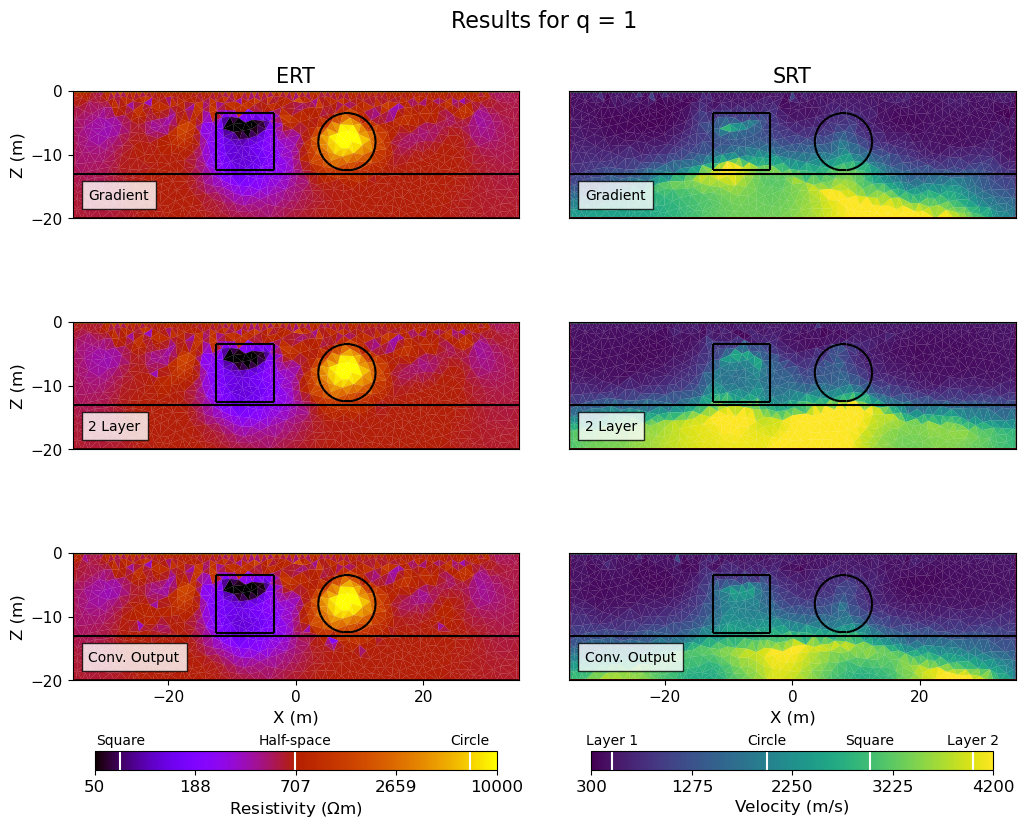

In [14]:
fig, ax, [cax1, cax2] = plotJointResultsComparison(invmesh, 
                                                   [r_est_jme1,r_est_jme2,r_est_jme3], 
                                                   [v_est_jme1,v_est_jme2,v_est_jme3], 
                                                   c_ert, c_srt, lim_ert, lim_srt, 
                                                   ['Gradient','2 Layer','Conv. Output'], labels=True,
                                                   ert_marks=ert_marks, srt_marks=srt_marks, 
                                                   ert_label=ert_label, srt_label=srt_label, marks=True, 
                                                   figsize=(10,7))
for axis_ar in ax:
    for axis in axis_ar:
        pg.viewer.mpl.drawPLC(axis, geom, fillRegion=False)
        axis.set_xlim(-35,35)
        axis.set_ylim(-20,0)
fig.suptitle(f'Results for q = {q}',fontsize=16, x=0.51, y=1.05)
ax[0,0].set_title('ERT',fontsize=15)
ax[0,1].set_title('SRT',fontsize=15)
for a in ax[:,0]:
    a.set_ylabel('Z (m)', fontsize=12)
    a.set_yticks([-20,-10,0])
for a in ax[-1,:]:
    a.set_xlabel('X (m)', fontsize=12)
    a.set_xticks([-20,0,20])
    
cax2.set_xlabel(pg.unit('vel'), fontsize=12)
cax1.tick_params(labelsize=12)
cax1.set_xlabel(pg.unit('res'), fontsize=12)
cax2.tick_params(labelsize=12)

# plt.savefig(path+f'Figures/Ch-3/Best_results_comp_{q}.pdf', bbox_inches='tight', dpi=600)

## Comparison Misfit

C:\Users\anton.ziegon\Documents\GitHubRepos\Joint-Minimum-Entropy-Inversion-Paper\Code\PlotFunctions_Ch4.py:291: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylab)


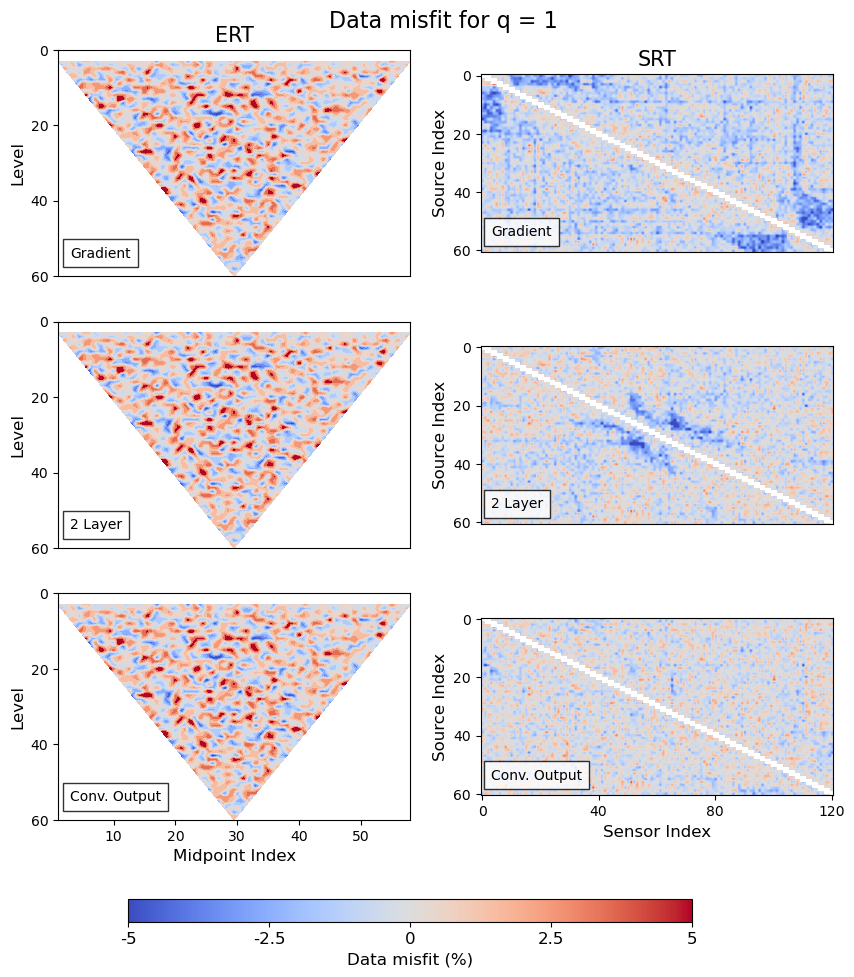

In [15]:
lim = [-5,5] # Misfit limits
label_list = ['Gradient','2 Layer','Conv. Output']
srt_mgrs = [SRT1,SRT2,SRT3]
ert_resp = [m.inv.response.array() for m in [ERT1,ERT2,ERT3]]

cmap='coolwarm'

fig, ax = plt.subplots(3,2, figsize=(10,10))

for i in range(3):
    # Plot misfits
    e_misfit =  100*(ert_data['rhoa'].array()-ert_resp[i])/ert_data['rhoa'].array()
    showPseudosections(ert_data, e_misfit, [0,len(ert_data['a'])], 1, ax=ax[i,0], clim=lim, cmap=cmap, Type='misfit', 
                       annotation=False, colorBar=False)
    
    showTTMatrix(srt_mgrs[i], 'misfit', ax[i,1], lim=lim, cmap=cmap, colorBar=False)
    
    # Add labels
    for axis in [ax[i,0],ax[i,1]]:
        axis.text(3, 55, label_list[i], fontsize=10, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})

# Adjust axes
for ax_ar in ax[:-1,:]:
    for axis in ax_ar:
        axis.set_xticks([])  
        axis.set_xlabel('')

# Add colorbar
cax = ax[-1,0].inset_axes([0.2, -0.45, 1.6, 0.1])
createColorBarOnly(ax=cax, cMin=lim[0], cMax=lim[1], logScale=False,cMap=cmap,
                   label='Data misfit (%)', orientation='horizontal')
cax.set_xlabel('Data misfit (%)', fontsize=12)
cax.tick_params(labelsize=12)

fig.suptitle(f'Data misfit for q = {q}',fontsize=16, x=.51, y=.92)
ax[0,0].set_title('ERT',fontsize=15)
ax[0,1].set_title('SRT',fontsize=15)

for a in ax[:,0]:
    a.set_ylabel('Level', fontsize=12)
    a.set_yticks([0,20,40,60])
    
for a in ax[:,1]:
    a.set_ylabel('Source Index', fontsize=12)
    
ax[-1,0].set_xlabel('Midpoint Index', fontsize=12)
ax[-1,1].set_xlabel('Sensor Index', fontsize=12)
ax[-1,1].set_xticks([0,40,80,120])
# plt.savefig(path+f'Figures/Ch-3/Best_misfit_comp_{q}.pdf', bbox_inches='tight',dpi=600)